# Assignment 8

## Part A

### i.

In [2]:
import pandas as pd
import glob

# The number of rows in each file
for file in glob.glob("*.csv"):
    mydf = pd.read_csv(file)
    row_count = mydf.shape[0]
    print("File {} has {} rows.".format(file, row_count))

File airlines.csv has 16 rows.
File weather.csv has 26115 rows.
File mydelay.csv has 18 rows.
File airports.csv has 1458 rows.
File planes.csv has 3322 rows.
File flights.csv has 336776 rows.


### ii.a.

In [3]:
from ggplot import *

# Import data file to a dataframe
flights = pd.read_csv("flights.csv")

# Draw histogram of all airlines for departure delay
# NA value will not count
for i, carrier in enumerate(flights.carrier.unique()):
    print(ggplot(flights[flights.carrier == carrier], aes(x = "dep_delay", y = "carrier")) + geom_histogram())

/anaconda3/lib/python3.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


<Figure size 1100x800 with 1 Axes>

<ggplot: (7554066173)>


<Figure size 1100x800 with 1 Axes>

<ggplot: (7554183709)>


<Figure size 1100x800 with 1 Axes>

<ggplot: (7554183709)>


<Figure size 1100x800 with 1 Axes>

<ggplot: (291615289)>


<Figure size 1100x800 with 1 Axes>

<ggplot: (291615289)>


<Figure size 1100x800 with 1 Axes>

<ggplot: (-9223372036559284455)>


<Figure size 1100x800 with 1 Axes>

<ggplot: (-9223372036563160502)>


<Figure size 1100x800 with 1 Axes>

<ggplot: (294771720)>


<Figure size 1100x800 with 1 Axes>

<ggplot: (-9223372036563111406)>


<Figure size 1100x800 with 1 Axes>

<ggplot: (-9223372036560858799)>


<Figure size 1100x800 with 1 Axes>

<ggplot: (295489947)>


<Figure size 1100x800 with 1 Axes>

<ggplot: (294368737)>


<Figure size 1100x800 with 1 Axes>

<ggplot: (-9223372036560407061)>


<Figure size 1100x800 with 1 Axes>

<ggplot: (291611491)>


<Figure size 1100x800 with 1 Axes>

<ggplot: (-9223372036563164307)>


<Figure size 1100x800 with 1 Axes>

<ggplot: (-9223372036559969620)>


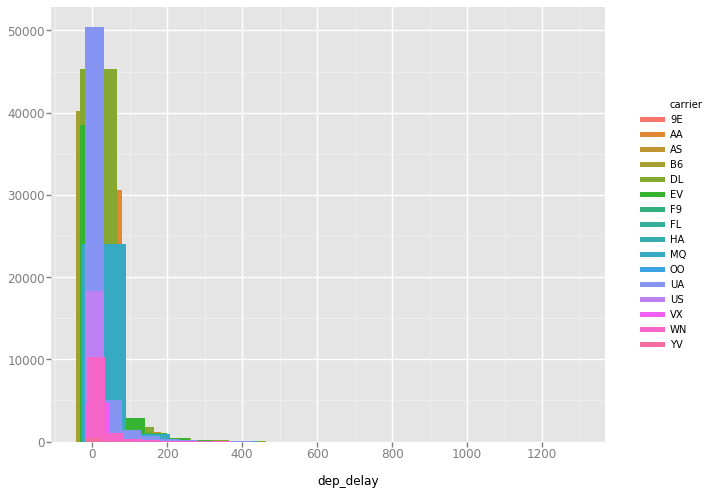

<ggplot: (-9223372036579235966)>

In [4]:
# Draw histogram together
ggplot(flights, aes(x = "dep_delay", fill = "carrier")) + geom_histogram()

### ii.b.

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


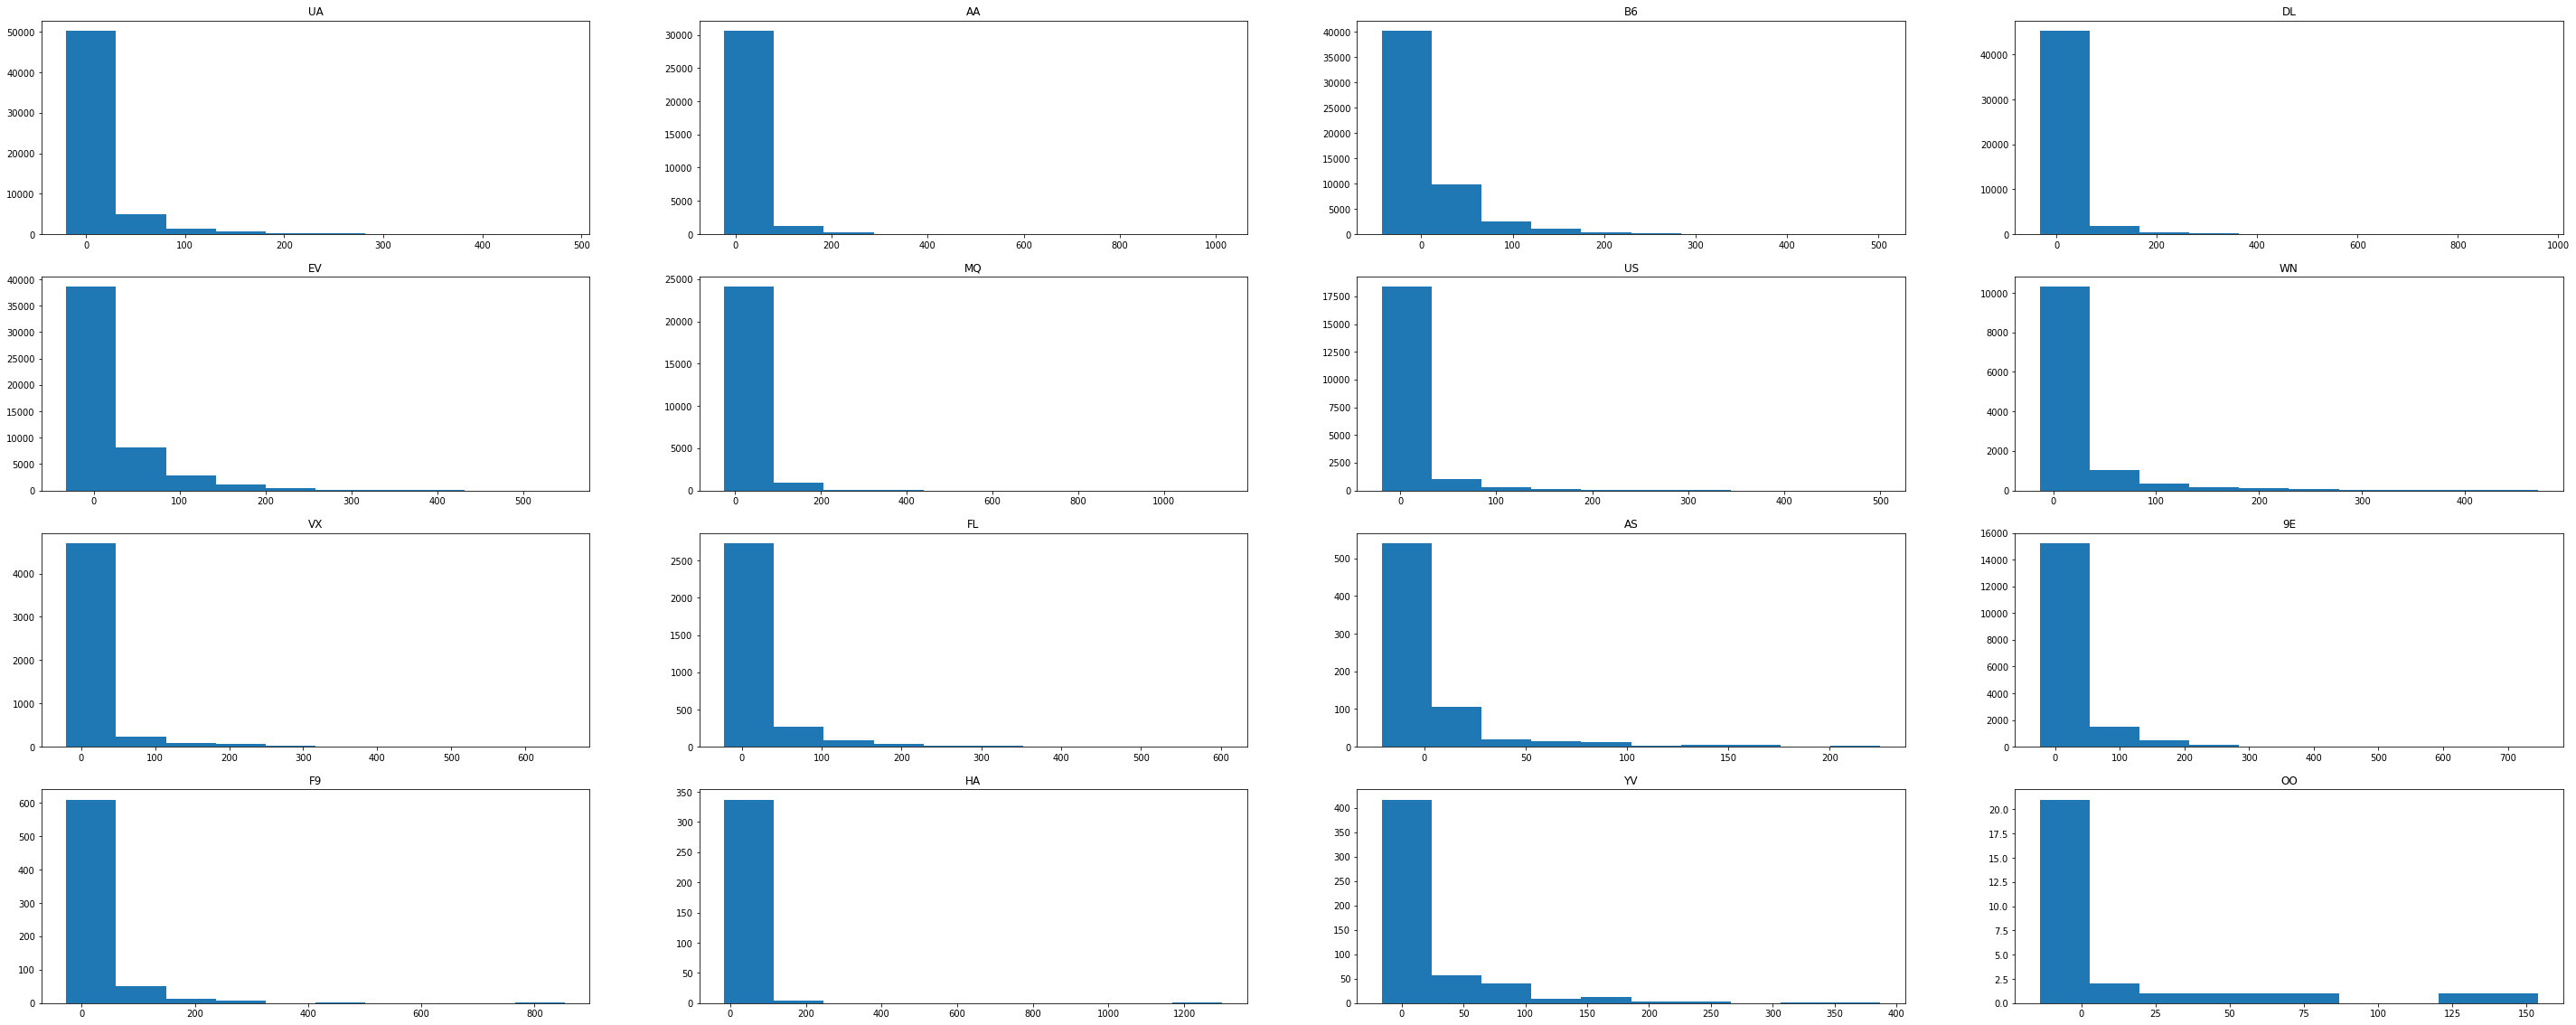

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# plt.figure(figsize=(15,10))
plt.figure(figsize=(50,20))   
for i, carrier in enumerate(flights.carrier.unique()):
    plt.subplot(4, 4, i + 1)
    plt.hist(flights[flights.carrier == carrier].dep_delay)
    plt.title(carrier)

### Which airlines is the best in terms of on time departure？

+ Based on the average depature delay time of the airlines, the US Airways(US) is the best.
+ Based on percent of the depature delay tiem less or equal to 0, the Hawaiian Airlines(HA) is the best.

In [6]:
# The average depature delay of each carrier
# .mean() automatically ignores the na
flights.groupby("carrier")["dep_delay"].mean().sort_values(ascending = True)  

carrier
US     3.782418
HA     4.900585
AS     5.804775
AA     8.586016
DL     9.264505
MQ    10.552041
UA    12.106073
OO    12.586207
VX    12.869421
B6    13.022522
9E    16.725769
WN    17.711744
FL    18.726075
YV    18.996330
EV    19.955390
F9    20.215543
Name: dep_delay, dtype: float64

In [7]:
# Percent of delay <=0 flights on each carrier
flights.groupby("carrier").apply(lambda x: x[flights.dep_delay <= 0].count() / x.count())["dep_delay"].sort_values(ascending = False)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  

carrier
HA    0.798246
US    0.759724
OO    0.689655
AA    0.683358
AS    0.682584
DL    0.680890
MQ    0.680841
B6    0.604109
9E    0.594453
YV    0.572477
VX    0.566361
EV    0.549439
UA    0.529813
F9    0.500000
FL    0.481017
WN    0.457254
Name: dep_delay, dtype: float64

### iii

In [26]:
flights.count()

year              336776
month             336776
day               336776
dep_time          328521
sched_dep_time    336776
dep_delay         328521
arr_time          328063
sched_arr_time    336776
arr_delay         327346
carrier           336776
flight            336776
tailnum           334264
origin            336776
dest              336776
air_time          327346
distance          336776
hour              336776
minute            336776
time_hour         336776
dtype: int64

In [10]:
# Get top 10 busiest airports
top10_airports_0 = flights.loc[:, ["dest", "time_hour"]].groupby("dest").count().sort_values(by = "time_hour", ascending = False).head(10)
top10_airports_0

,time_hour
dest,
ORD,17283
ATL,17215
LAX,16174
BOS,15508
MCO,14082
CLT,14064
SFO,13331
FLL,12055
MIA,11728


In [11]:
# Calculate the number of flights per day in each airport and add it to dataframe
top10_airports_0["avg"] = top10_airports_0.time_hour.apply(lambda x: x / 365)

In [12]:
# Get int-arrival time of top 10 airports by days and airlines
int_arrival = flights[flights.dest.isin(list(top10_airports_0.index))].groupby(["year", "month", "day", "dest"]).apply(lambda x: 24*60 / x.count())["time_hour"]

In [13]:
# Get mean and std of int-arrival time and add them to dataframe
top10_airports_0["mean"] = int_arrival.groupby("dest").mean()
top10_airports_0["std"] = int_arrival.groupby("dest").std()

In [14]:
# Import dataset with full names of airports
airports = pd.read_csv("airports.csv")

# Left join full names of airports into top 10 busiest airports
top10_airports_1 = pd.merge(top10_airports_0, airports[["faa", "name"]], left_on = "dest", right_on = "faa", how = "left")

In [15]:
# Drop columns
top10_airports_2 = top10_airports_1.drop(columns = ["time_hour", "faa"])

# Reorder columns
top10_airports_3 = top10_airports_2[["name", "avg", "mean", "std"]]

# Rename columns
top10_airports = top10_airports_3.rename(index = str, columns = {"name": "Airport Name", "avg": "Average Number of Flight per Day", "mean": "Mean", "std": "Standard Deviation"})
top10_airports

,Airport Name,Average Number of Flight per Day,Mean,Standard Deviation
0,Chicago Ohare Intl,47.350685,31.864393,8.037862
1,Hartsfield Jackson Atlanta Intl,47.164384,31.014863,4.248234
2,Los Angeles Intl,44.312329,33.004458,4.308081
3,General Edward Lawrence Logan Intl,42.487671,35.985255,10.036623
4,Orlando Intl,38.580822,37.557588,3.053141
5,Charlotte Douglas Intl,38.531507,37.827613,4.299194
6,San Francisco Intl,36.523288,40.649739,7.663402
7,Fort Lauderdale Hollywood Intl,33.027397,44.405708,5.967608
8,Miami Intl,32.131507,44.972533,2.704768
9,Ronald Reagan Washington Natl,26.589041,58.961304,20.979369


### iv

In [33]:
top5_airports_0 = flights[flights.dest == "ORD"].groupby(["year", "month", "day", "dest"]).apply(lambda x: 24*60 / x.count())["time_hour"].reset_index()
top5_airports = top5_airports_0.drop(columns = ["year", "month", "day"])
top5_airports.head()

,dest,time_hour
0,ORD,30.638298
1,ORD,32.000000
2,ORD,31.304348
3,ORD,31.304348
4,ORD,55.384615


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


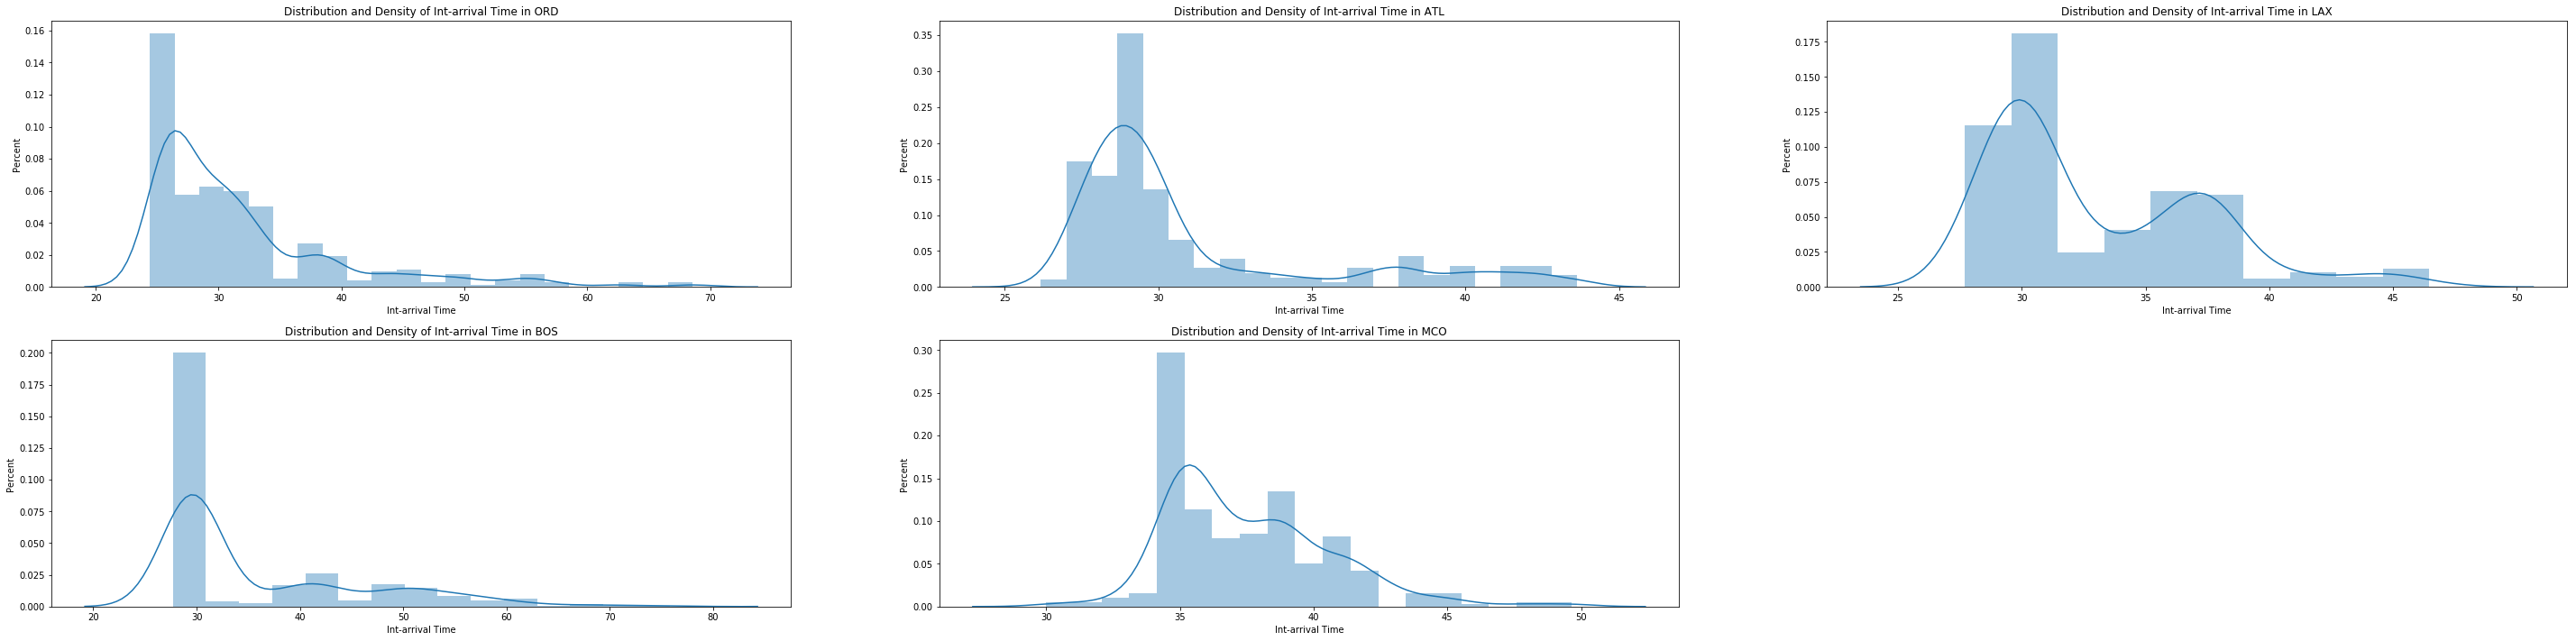

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

top5_airports_name = list(top10_airports_0.index[:5])

plt.figure(figsize=(50,25))   
for i, airport in enumerate(top5_airports_name):
    top5_airports_0 = flights[flights.dest == airport].groupby(["year", "month", "day", "dest"]).apply(lambda x: 24*60 / x.count())["time_hour"].reset_index()
    top5_airports = top5_airports_0.drop(columns = ["year", "month", "day"])
    plt.subplot(4, 3, i + 1)
    sns.distplot(top5_airports["time_hour"], hist=True, kde=True)
    plt.title("Distribution and Density of Int-arrival Time in " + airport)
    plt.xlabel("Int-arrival Time")
    plt.ylabel("Percent")

In [18]:
# top5_airports_0 = flights[flights.dest.isin(list(top10_airports_0.index[:5]))].groupby(["year", "month", "day", "dest"]).apply(lambda x: 24*60 / x.count())["time_hour"].reset_index()
# top5_airports = top5_airports_0.drop(columns = ["year", "month", "day"])
# g = sns.FacetGrid(top5_airports, col="dest", col_wrap = 3)
# g.map(plt.hist, "time_hour");

## Part B

### i.

In [19]:
import pandas as pd

flights = pd.read_csv("flights.csv")
weather = pd.read_csv("weather.csv")

# Left join
myjoin = pd.merge(flights, weather, on = ["time_hour", "origin"], how = "left")
myjoin.shape

(336776, 32)

### ii.

In [20]:
# Select flights by required conditions
mydelay = myjoin[(myjoin.origin == "JFK") & (myjoin.dep_delay > 600)]
mydelay.shape

(18, 32)

### iii.

In [21]:
# Keep temp, humid, wind_speed, precip from mydelay
mydelay_weather = mydelay[["temp", "humid", "wind_speed", "precip"]]
mydelay_weather.mean()

temp          56.720000
humid         72.668333
wind_speed    15.727327
precip         0.012222
dtype: float64

### iv.

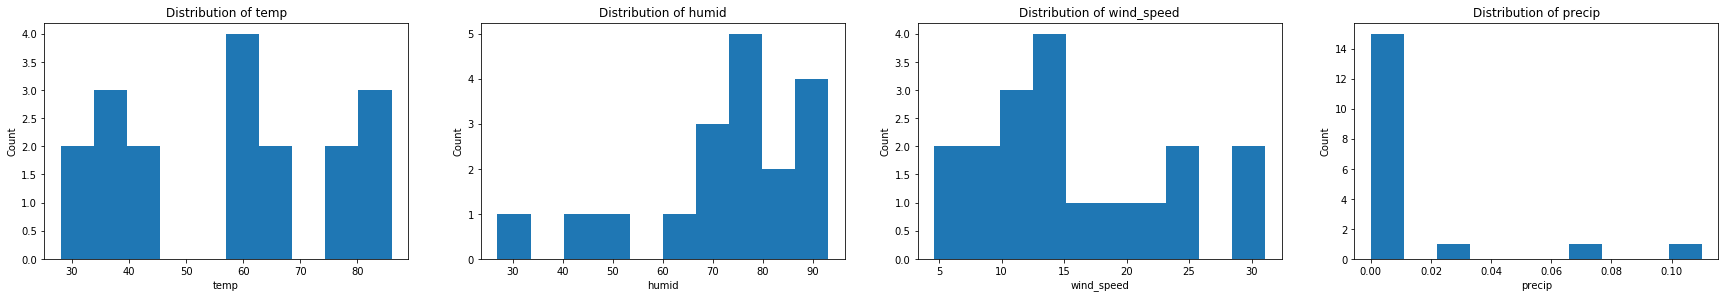

In [22]:
weather_ind = list(mydelay_weather.columns.values)

plt.figure(figsize=(30,20))
for i, indicator in enumerate(weather_ind):
    plt.subplot(4, 4, i + 1)
    plt.hist(mydelay_weather[indicator]) 
    plt.title("Distribution of " + indicator)
    plt.xlabel(indicator)
    plt.ylabel("Count")

### v.

In [23]:
mydelay.to_csv("mydelay.csv")

### vi.

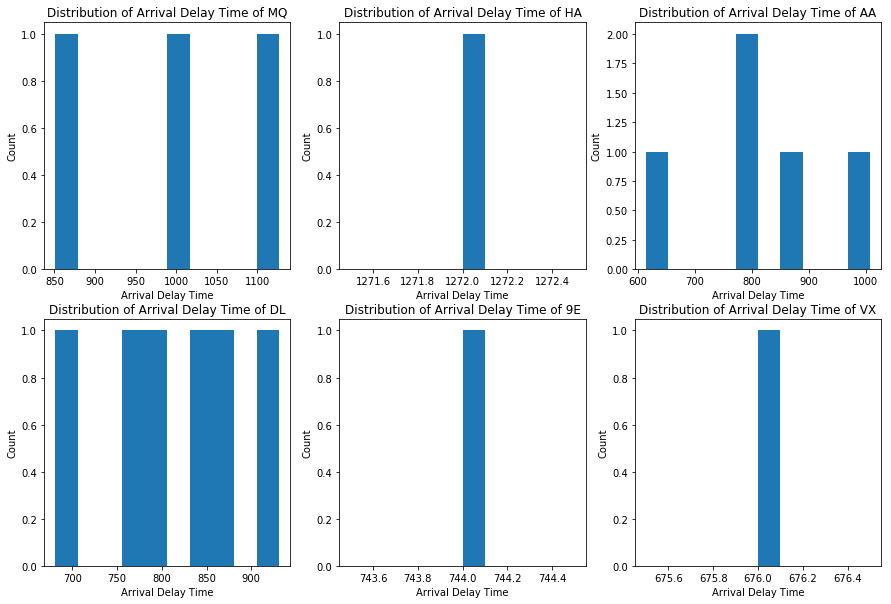

In [51]:
from math import ceil
carriers = mydelay.carrier.unique()

plt.figure(figsize=(15,10))
for i, carrier in enumerate(carriers):    
    plt.subplot(ceil(len(carriers)/3), 3, i + 1)
    plot = plt.hist(mydelay[mydelay.carrier == carrier].arr_delay)
    plt.title("Distribution of Arrival Delay Time of " + carrier)
    plt.xlabel("Arrival Delay Time")
    plt.ylabel("Count")



In [41]:
len(carriers)

6

In [25]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
